# Retrieval

Retrieval in LangChain refers to the process of fetching relevant information from a specified data source (vector store).

Retrieval is the centerpiece of our retrieval augmented generation (RAG) flow.

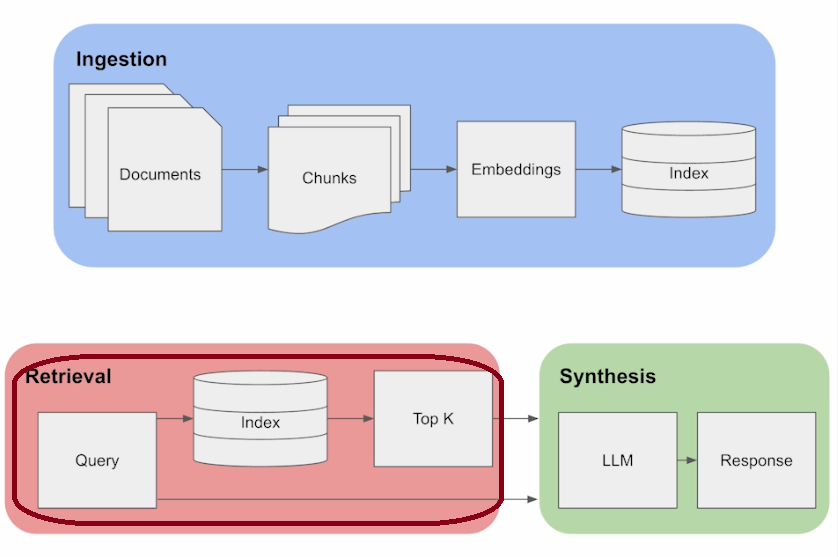

In [ ]:
!pip install qdrant_client langchain_huggingface langchain-community langchain-qdrant pypdf openai langchain transformers langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.9/258.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/2

In [ ]:
from qdrant_client import QdrantClient
from langchain_core.documents import Document
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_qdrant import QdrantVectorStore
import openai
import os

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [ ]:
# Initialize embedding model with BAAI/bge-small-en-v1.5
embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')


<ipython-input-3-3d4ca37c1a92>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your setti

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Load the PDF document using PyPDFLoader
loaders = PyPDFLoader("/content/National_AI_Policy_Consultation_Draft_1722220582.pdf")


# Extract pages from the loaded PDF
pages = loaders.load()


In [ ]:
pages[15]

Document(metadata={'source': '/content/National_AI_Policy_Consultation_Draft_1722220582.pdf', 'page': 15}, page_content=" \n \n1 \n 4 Policy Directives  \nThe policy directives are minimalistic, focusing  on resolving issues and achieving targets set for stimulating \ngrowth in AI across the board. Empathizing with  the common  person's journey  for different aspects \nassociated with their socio -economic development and well -being in the current technological disruption \nis driven through the following developmental pillars.  \n4.1 1st Pillar: AI Market Enablement  \n4.1.1  National Artificial Intelligence Fund (NA IF)  \nGiven the evidence regarding the state of AI in Pakistan, the projected global outlook of AI in terms of its \nuse and market size, the impact of AI on the local ecosystem , and claiming its demographic share through \nresponsible use of data, the Ministry  of IT & Telecom through its underutilized resources and funds aims \nto establish a National AI Fund with fo

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [ ]:
# Create an empty list to store processed document chunks
doc_list = []

# Iterate over each page in the extracted pages
for page in pages:
    # Split the page content into smaller chunks
    pg_split = text_splitter.split_text(page.page_content)

    # Iterate over each chunk and create Document objects
    for pg_sub_split in pg_split:
        # Metadata for each chunk, including source and page number
        metadata = {"source": "AI policy", "page_no": page.metadata["page"] + 1}

        # Create a Document object with content and metadata
        doc_string = Document(page_content=pg_sub_split, metadata=metadata)

        # Append the Document object to the list
        doc_list.append(doc_string)

In [ ]:
qdrant_url = ""
qdrant_key = ""
collection_name = "AI_policy_new"

In [ ]:
# Initialize QdrantVectorStore with documents and embedding model
qdrant = QdrantVectorStore.from_documents(
    doc_list,                # List of Document objects to be stored in the vector store
    embed_model,             # Embedding model used to convert documents into vectors
    url=qdrant_url,          # URL for the Qdrant service
    api_key=qdrant_key,      # API key for accessing the Qdrant service
    collection_name=collection_name  # Name of the collection to store the vectors in
)

In [ ]:
question = "What is AI policy for students?"

In [ ]:
docs_ss = qdrant.similarity_search(question,k=5)

In [ ]:
docs_ss[0].page_content

'4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data protection and AI, it also aims to stimulate  an incremental impact of AI on society \nright from the grassroots . Therefore, the policy has given equal importance to teach ing algorithms, \ndata science , and AI in basic STEM education . In this regard, it stipulates that. CoE-AI shall  hire a \nlocal/international consultant with expertise in high -tech curriculum development to develop a \nNational Curriculum in Algorithms, Data Sciences, AI , and Allied Technologies from the sixth to the  \ntwelfth standard.'

## Drawbacks of Similarity Search

returns the same chunks

In [ ]:
docs_ss[1].page_content

'4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data protection and AI, it also aims to stimulate  an incremental impact of AI on society \nright from the grassroots . Therefore, the policy has given equal importance to teach ing algorithms, \ndata science , and AI in basic STEM education . In this regard, it stipulates that. CoE-AI shall  hire a \nlocal/international consultant with expertise in high -tech curriculum development to develop a \nNational Curriculum in Algorithms, Data Sciences, AI , and Allied Technologies from the sixth to the  \ntwelfth standard.'

### Addressing Diversity: Maximum marginal relevance (MMR)

 Solves overlap problem and to enforce diversity in search results.

`Maximum marginal relevance` strives to achieve both relevance to the query *and diversity* among the results.

In [ ]:
docs_mmr = qdrant.max_marginal_relevance_search(question,k=5)

In [ ]:
docs_mmr[0].page_content

'4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data protection and AI, it also aims to stimulate  an incremental impact of AI on society \nright from the grassroots . Therefore, the policy has given equal importance to teach ing algorithms, \ndata science , and AI in basic STEM education . In this regard, it stipulates that. CoE-AI shall  hire a \nlocal/international consultant with expertise in high -tech curriculum development to develop a \nNational Curriculum in Algorithms, Data Sciences, AI , and Allied Technologies from the sixth to the  \ntwelfth standard.'

In [ ]:
docs_mmr[1].page_content

'i\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n                        Draft\nNational\n \nArtificial Intelligence Policy\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGovernment of Pakistan\nMinistry of Information Technology & Telecommunication\nhttps://moitt.gov.pk'

### Addressing Specificity: working with metadata

In last lecture, we showed that a question about the third lecture can include results from other lectures as well.

To address this, many vectorstores support operations on `metadata`.

`metadata` provides context for each embedded chunk.

In [ ]:
docs = qdrant.similarity_search(
    question,
    k=3,
    filter={
        "must": [
            {
                "key": "page",
                "match": {
                    "value": 3
                }
            }
        ]
    }
)

In [ ]:
docs

[]

Similartly we can use "should" , "must not" , "match', match any". for more details visit link: https://qdrant.tech/documentation/concepts/filtering/

## Other types of retrieval

It's worth noting that vectordb as not the only kind of tool to retrieve documents.

The `LangChain` retriever abstraction includes other ways to retrieve documents, such as TF-IDF or SVM.

In [ ]:
from langchain.retrievers import SVMRetriever
from langchain.retrievers import TFIDFRetriever
# from langchain.document_loaders import PyPDFLoader
# from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
texts = [doc.page_content for doc in doc_list]
svm_retriever = SVMRetriever.from_texts(texts, embed_model)
tfidf_retriever = TFIDFRetriever.from_texts(texts)


In [ ]:
question = "what is AI policy document about?"
docs_svm=svm_retriever.get_relevant_documents(question)
docs_svm[0]

<ipython-input-22-8f3f1cfdcd35>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs_svm=svm_retriever.get_relevant_documents(question)


Document(metadata={}, page_content='i\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n                        Draft\nNational\n \nArtificial Intelligence Policy\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGovernment of Pakistan\nMinistry of Information Technology & Telecommunication\nhttps://moitt.gov.pk')

In [ ]:
question = "what is AI policy document about?"
docs_tfidf=tfidf_retriever.get_relevant_documents(question)
docs_tfidf[0]

Document(metadata={}, page_content='6 \n 1 Executive  Summary  \nPakistan has a unique opportunity to harness digital disruption by educating an eager young population \nthat can potentially propel the n ation onto a growth trajectory to sustain our future national \ncompetitiveness and improve the lives of citizens. Artificial Intelligence (AI) represents the next frontier of \ntechnological opportunities, and it has been widely proven and understood that the  collection, processing, \nuse, and exchange of data through automated/intelligent means would drive the entire society into the \nnext stage of its evolution which is unprecedented and requires a progressive , yet careful approach. So, \nafter a thorough analysi s of the global perspective and based on the evidence collected through more \nextensive consultations with the stakeholders, the Ministry of IT & Telecom has come to a much -desired \nconclusion that it needs to chalk out a developmental roadmap for better, faster and r